In [ ]:
!pip install -U azure-quantum
!pip install -U azure-quantum[qiskit]
!pip install -U qiskit_machine_learning
!pip install pylatexenc
!pip install qiskit --upgrade;
!pip install qiskit-aer;
!pip install qiskit-terra;
!pip install qiskit-machine-learning;

     -------------------------------------- 169.7/169.7 kB 3.4 MB/s eta 0:00:00
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
     ------------------------------------- 323.6/323.6 kB 10.1 MB/s eta 0:00:00
     -------------------------------------- 904.2/904.2 kB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 174.5/174.5 kB ? eta 0:00:00
  Using cached aiofile-3.8.1.tar.gz (18 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached msrest-0.7.1-py3-none-any.whl (85 kB)
     ------------------------------------- 387.8/387.8 kB 23.6 MB/s eta 0:00:00
  Using cached azure_identity-1.12.0-py3-none-any.whl (135 kB)
  Using cached caio-0.9.11-py3-none-any.whl (19 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
     ---------------------------------------- 56.8/56.8 kB ? eta 0:00:00
  Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
     --------------------------------

  Using cached python_markdown_math-0.8-py3-none-any.whl (5.9 kB)
  Using cached qiskit_qir-0.2.0-py2.py3-none-any.whl (18 kB)
  Using cached qiskit_ionq-0.3.10-py3-none-any.whl (35 kB)
  Using cached Markdown-3.4.1-py3-none-any.whl (93 kB)
  Using cached retry-0.9.2-py2.py3-none-any.whl (8.0 kB)
  Using cached pyqir_generator-0.4.2a1-cp36-abi3-win_amd64.whl (4.6 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 4.6/4.6 MB 2.8 MB/s eta 0:00:00
  Using cached qiskit_aer-0.11.2-cp39-cp39-win_amd64.whl (9.6 MB)
     -------------------------------------- 241.3/241.3 kB 3.7 MB/s eta 0:00:00
  Using cached websocket_client-1.3.3-py3-none-any.whl (54 kB)
  Created wheel for qiskit: filename=qiskit-0.41.0-py3-none-any.whl size=12827 sha256=4386d258fe082b48df3d6a20e5522b7107ca0d588331bf3611312b77374655de
  Stored in directory: c:\users\madji\appdata\local\pip\cache\wheels\48\c7\82\0249cc392d60


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --upgrade;


In [ ]:
import qiskit
print(qiskit.__version__)

0.23.1


In [ ]:
#Function to load a file from a publicly accessible URL
import urllib.request

def download_file(url, save_path):
    urllib.request.urlretrieve(url, save_path)
    print(f'File successfully downloaded to {save_path}.')

In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from azure.quantum.qiskit import AzureQuantumProvider
from qiskit import QuantumCircuit, execute, Aer
from qiskit import *
from qiskit.utils import QuantumInstance
from azure.quantum import Workspace

provider = AzureQuantumProvider (
    resource_id = "/subscriptions/2501e059-13d8-4207-85d6-ec58656e2fae/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/Rigetti",
    location = "eastus"
)

print("This workspace's targets:")
for backend in provider.backends():
    print("- " + backend.name())

workspace = Workspace (
    subscription_id = "2501e059-13d8-4207-85d6-ec58656e2fae",
    resource_group = "AzureQuantum",
    name = "Rigetti",
    location = "eastus"

)



# Create IonQ simulator and QPU backends
ionq_simulator_backend = provider.get_backend("ionq.simulator")
ionq_qpu_backend = provider.get_backend("ionq.qpu")

# Create Rigetti simulator and QPU backends
rigetti_simulator_backend = provider.get_backend("rigetti.sim.qvm")
rigetti_qpu_backend = provider.get_backend("rigetti.qpu.aspen-m-3")

# Create Quantinuum simulator and QPU backends
Quantinuum_simulator_backend = provider.get_backend("quantinuum.sim.h1-2sc")
Quantinuum_qpu_backend = provider.get_backend("quantinuum.qpu.h1-2")

# Create QASM simulator 
backend = Aer.get_backend('qasm_simulator')

This workspace's targets:
- ionq.qpu
- ionq.qpu.aria-1
- ionq.simulator
- quantinuum.hqs-lt-s1
- quantinuum.hqs-lt-s1-apival
- quantinuum.hqs-lt-s2
- quantinuum.hqs-lt-s2-apival
- quantinuum.hqs-lt-s1-sim
- quantinuum.hqs-lt-s2-sim
- quantinuum.qpu.h1-1
- quantinuum.sim.h1-1sc
- quantinuum.qpu.h1-2
- quantinuum.sim.h1-2sc
- quantinuum.sim.h1-1e
- quantinuum.sim.h1-2e
- rigetti.sim.qvm
- rigetti.qpu.aspen-11
- rigetti.qpu.aspen-m-2
- rigetti.qpu.aspen-m-3
- microsoft.estimator


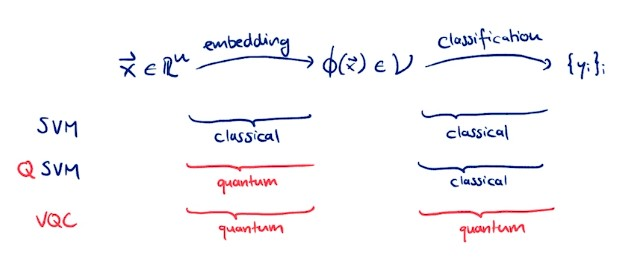

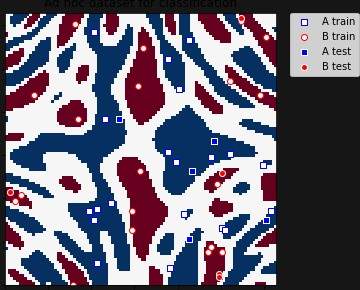

In [ ]:
#vqc
from qiskit import transpile, BasicAer, QuantumCircuit
backend = BasicAer.get_backend("qasm_simulator")
#backend = rigetti_simulator_backend
#backend = ionq_simulator_backend 
#backend  = Quantinuum_simulator_backend

In [ ]:
print(backend)

qasm_simulator


In [ ]:
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap, ZFeatureMap
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit.algorithms.optimizers import SLSQP, SPSA
from qiskit.circuit.library import TwoLocal
from qiskit import Aer, transpile

import numpy as np
import matplotlib.pyplot as plt
import datetime
import concurrent.futures
import time
import os
import csv
import pandas as pd
from IPython.display import clear_output

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Binarizer
from sklearn.decomposition import PCA


n_features = 7
training_size = 700
test_size = 300
feature_dim = 7
num_samples = 1000
datafilename="BotnetDgaDataset_1000.csv"
resultname="result_BotnetDgaDataset_1000.txt"
cwd=os.getcwd()
mycsv=cwd+"/"+datafilename

download_file('https://aq5efd7d2644dd406cb3ec2d.blob.core.windows.net/dga/BotnetDgaDataset_1000.csv', mycsv)

#download_file('https://aq5efd7d2644dd406cb3ec2d.blob.core.windows.net/dga/BotnetDgaDataset_10.csv', mycsv)

def load_data(filepath):

    with open(filepath) as csv_file:
        data_file = csv.reader(csv_file)
        temp = next(data_file)
        n_samples = 1000
        n_features = 7
        target_names = np.array(temp[2:])
        data = np.empty((n_samples, n_features))
        target = np.empty((n_samples,), dtype=np.int)

        for i, ir in enumerate(data_file):
            data[i] = np.asarray(ir[:-1], dtype=np.float64)
            target[i] = np.asarray(ir[-1], dtype=np.int)

    return data, target, target_names

File successfully downloaded to C:\Users\madji/BotnetDgaDataset_1000.csv.


In [ ]:
def _convert_data_dataframe(data, target,
                            feature_names, target_names):
    data_df = pd.DataFrame(data, columns=feature_names)
    target_df = pd.DataFrame(target, columns=target_names)
    combined_df = pd.concat([data_df, target_df], axis=1)
    X = combined_df[feature_names]
    y = combined_df[target_names]
    if y.shape[1] == 1:
        y = y.iloc[:, 0]
    return combined_df, X, y


def load_botnetdga(*, as_frame=False):

    data, target, target_names = load_data('BotnetDgaDataset_1000.csv')



    feature_names = ['MinREBotnets',
                     'CharLength',
                     'TreeNewFeature',
                     'nGramReputation_Alexa']

    frame = None
    target_columns = ['target', ]
    if as_frame:
        frame, data, target = _convert_data_dataframe(data,
                                                      target,
                                                      feature_names,
                                                      target_columns)

    return data, target


def botnetdga(training_size, test_size, n,
              standardize=False, pca=False, scale=False, plot_data=False,
              binarize=False):

    class_labels = [r'benign', r'dga']

    data, target = load_botnetdga()
    sample_train, sample_test, label_train, label_test = \
        train_test_split(data, target, train_size=training_size, test_size=test_size, random_state=7)

    # print("\n load_botnetdga sample_train = \n")
    # print(sample_train)
    # print("\n load_botnetdga sample_test = \n")
    # print(sample_test)

    # Now we standardize for gaussian around 0 with unit variance
    if standardize:
        std_scale = StandardScaler().fit(sample_train)
        sample_train = std_scale.transform(sample_train)
        sample_test = std_scale.transform(sample_test)

        # print("\n standardize sample_train = \n")
        # print(sample_train)
        # print("\n standardize sample_test = \n")
        # print(sample_test)

    # Now reduce number of features to number of qubits
    if pca:
        pca = PCA(n_components=n).fit(sample_train)
        sample_train = pca.transform(sample_train)
        sample_test = pca.transform(sample_test)

        # print("\n pca sample_train = \n")
        # print(sample_train)
        # print("\n pca sample_test = \n")
        # print(sample_test)

    # Scale to the range (-1,+1)
    if scale:
        samples = np.append(sample_train, sample_test, axis=0)
        minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
        sample_train = minmax_scale.transform(sample_train)
        sample_test = minmax_scale.transform(sample_test)

        # print("\n scale sample_train = \n")
        # print(sample_train)
        # print("\n scale sample_test = \n")
        # print(sample_test)

    if binarize:
        med = np.median(np.append(sample_train, sample_test, axis=0), axis=0)

        # print("\n binarize np.append(sample_train, sample_test, axis=0) = \n")
        # print(np.append(sample_train, sample_test, axis=0)[:5])
        # print("\n binarize med = \n")
        # print(med)

        transformer = Binarizer(threshold=med)
        # print("\n binarize transformer = \n")
        # print(transformer)

        sample_train = transformer.transform(sample_train)
        sample_test = transformer.transform(sample_test)

        # print("\n binarize sample_train = \n")
        # print(sample_train)
        # print("\n binarize sample_test = \n")
        # print(sample_test)

    # Pick training size number of samples from each distro
    training_input = {key: (sample_train[label_train == k, :])[:training_size]
                      for k, key in enumerate(class_labels)}
    test_input = {key: (sample_test[label_test == k, :])[:test_size]
                  for k, key in enumerate(class_labels)}

    return sample_train, training_input, test_input, class_labels

In [ ]:
#import time
start = time.perf_counter()

# BotnetDGA data set
plot_data = False
training_size = 700
test_size = 300
feature_dim = 7
standardize = False
pca = False
scale = False
binarize = False



# random_seed = 10598
# shots = 1024
# seed = 1376
# aqua_globals.random_seed = seed

sample_train, training_input, test_input, class_labels = botnetdga(training_size=training_size,
                                                                    test_size=test_size,
                                                                    n=feature_dim,
                                                                    standardize=standardize,
                                                                    pca=pca,
                                                                    scale=scale,
                                                                    plot_data=plot_data,
                                                                    binarize=binarize)

# print("\n sample_train = \n")
# print(sample_train)
# print("\n training_input = \n")
# print(training_input)
# print("\n test_input = \n")
# print(test_input)
# print("\n class_labels = \n")
# print(class_labels)

optimizer1 = SPSA()
#optimizer2 = ADAM()
#optimizer3 = AQGD()
#optimizer4 = CG()
#optimizer5 = COBYLA()
#optimizer6 = L_BFGS_B()
#optimizer7 = GSLS()
#optimizer8 = NELDER_MEAD()
#optimizer9 = NFT()
#optimizer10 = P_BFGS()
#optimizer11 = POWELL()
#optimizer12 = SLSQP()
#optimizer13 = TNC()

nFeature = 7

#feature_map1 = RawFeatureVector(nFeature)
#feature_map2 = PauliFeatureMap(nFeature)
feature_map3 = ZFeatureMap(nFeature)
#feature_map4 = ZZFeatureMap(nFeature)

#var_form11 = TwoLocal(feature_map1.num_qubits, ['ry', 'rz'], 'cz')
#var_form12 = RealAmplitudes(feature_map1.num_qubits)
#var_form13 = EfficientSU2(feature_map1.num_qubits)
#var_form14 = ExcitationPreserving(feature_map1.num_qubits)

#var_form21 = TwoLocal(feature_map2.num_qubits, ['ry', 'rz'], 'cz')
#var_form22 = RealAmplitudes(feature_map2.num_qubits)
#var_form23 = EfficientSU2(feature_map2.num_qubits)
#var_form24 = ExcitationPreserving(feature_map2.num_qubits)

#var_form31 = TwoLocal(feature_map3.num_qubits, ['ry', 'rz'], 'cz')
var_form32 = RealAmplitudes(feature_map3.num_qubits)
#var_form33 = EfficientSU2(feature_map3.num_qubits)
#var_form34 = ExcitationPreserving(feature_map3.num_qubits)

#var_form41 = TwoLocal(feature_map4.num_qubits, ['ry', 'rz'], 'cz')
#var_form42 = RealAmplitudes(feature_map4.num_qubits)
#var_form43 = EfficientSU2(feature_map4.num_qubits)
#var_form44 = ExcitationPreserving(feature_map4.num_qubits)

C:\Users\madji\AppData\Local\Temp\ipykernel_29124\2915005824.py:47: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
C:\Users\madji\AppData\Local\Temp\ipykernel_29124\2915005824.py:51: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

In [ ]:
#vqc.fit(training_input,class_labels)
print(training_input)
print(class_labels)

{'benign': array([[2.94770278e+00, 1.41078881e+00, 1.45160138e+00, ...,
        1.30000000e+01, 1.07095312e-01, 8.96207802e+01],
       [3.57661764e+00, 1.08988214e+00, 1.06296229e+00, ...,
        2.40000000e+01, 3.67645424e-01, 1.73533340e+02],
       [2.84535094e+00, 1.30280393e+00, 1.14863855e+00, ...,
        1.50000000e+01, 1.07095312e-01, 9.00789883e+01],
       ...,
       [2.91397707e+00, 1.12604680e+00, 1.00883886e+00, ...,
        1.50000000e+01, 1.07095312e-01, 1.02533812e+02],
       [2.44643934e+00, 1.91598732e+00, 1.58416085e+00, ...,
        1.30000000e+01, 3.53116900e-01, 8.24120758e+01],
       [3.12192809e+00, 1.31420411e+00, 1.79499899e+00, ...,
        1.30000000e+01, 1.07095312e-01, 3.78732592e+01]]), 'dga': array([[4.13433611e+00, 2.77401164e+00, 8.35518955e-01, ...,
        3.10000000e+01, 9.90471212e-01, 1.80466538e+01],
       [3.64022393e+00, 1.43783046e+00, 9.25096949e-01, ...,
        2.00000000e+01, 9.90471212e-01, 5.35883633e+01],
       [3.27661087e+00, 

In [ ]:
import numpy as np
points_train = np.concatenate([training_input['benign'], training_input['dga']])
labels_train = np.concatenate([np.ones(len(training_input['benign'])), -np.ones(len(training_input['dga']))])
points_test = np.concatenate([test_input['benign'], test_input['dga']])
labels_test = np.concatenate([np.ones(len(test_input['benign'])), -np.ones(len(test_input['dga']))])

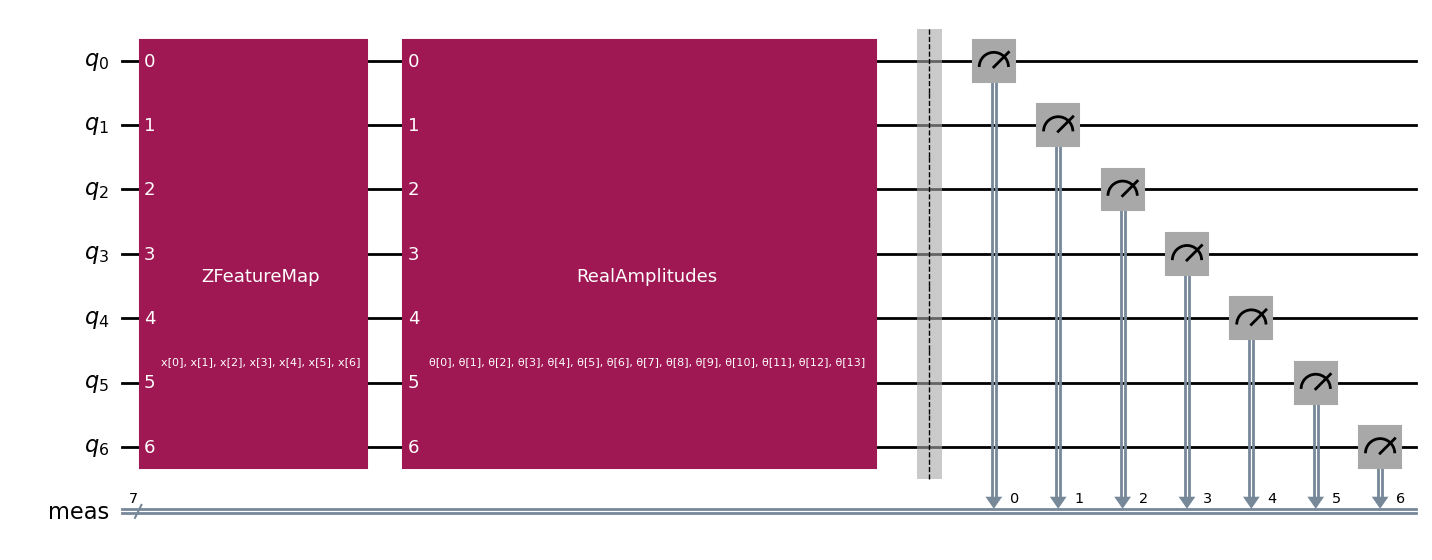

In [ ]:
from qiskit.circuit.library import RealAmplitudes, ZFeatureMap, ZZFeatureMap, EfficientSU2

num_features =7
feature_map=ZFeatureMap(num_features,reps=1)
model=RealAmplitudes(num_features, reps=1, entanglement="pairwise")
circuit=feature_map.compose(model)
circuit.measure_all()
circuit.draw("mpl",style="iqx")
circuit.decompose().draw("mpl", style="iqx")

In [ ]:
# Convert the input array to integer type
labels_train_int = labels_train.astype(int)

# Compute the one-hot encoding
one_hot = np.zeros((labels_train_int.size, labels_train_int.max()+1))
one_hot[np.arange(labels_train_int.size), labels_train_int] = 1



In [ ]:
from qiskit_machine_learning.algorithms import VQC
from qiskit.algorithms.optimizers import COBYLA

vqc = VQC(num_features, 
          feature_map=feature_map, 
          ansatz=model, 
          loss="cross_entropy",
          optimizer=SPSA(),
          quantum_instance=backend)
vqc.fit(points_train,one_hot)
vqc_predictions=vqc.predict(points_test)

In [ ]:
count=0
for i in range(0, len(points_test)):
    if(vqc_predictions[i][1]==one_hot[i][1]):
        count=count+1
print(count/300)

0.82


In [ ]:
#initial value
x0=vqc.fit_result.x
print(x0)

[-0.07702609  2.11296247  1.15799264  1.77333299  0.81279022  0.44677468
  0.77032352  0.83110035  0.63275361  0.59388238  0.39987149  0.06584635
  0.98788466  0.94937195]


In [ ]:
x0=[0.4363161,  2.65366906, 1.72138255, 0.49882964, 0.42451051, 0.46962214,
 0.96819199, 2.24746062, 0.02572909, 1.91850447, 1.91736627, 1.52546757,
 0.19497052, 1.63852761]

In [ ]:
circuit.decompose().draw("mpl", style="iqx")

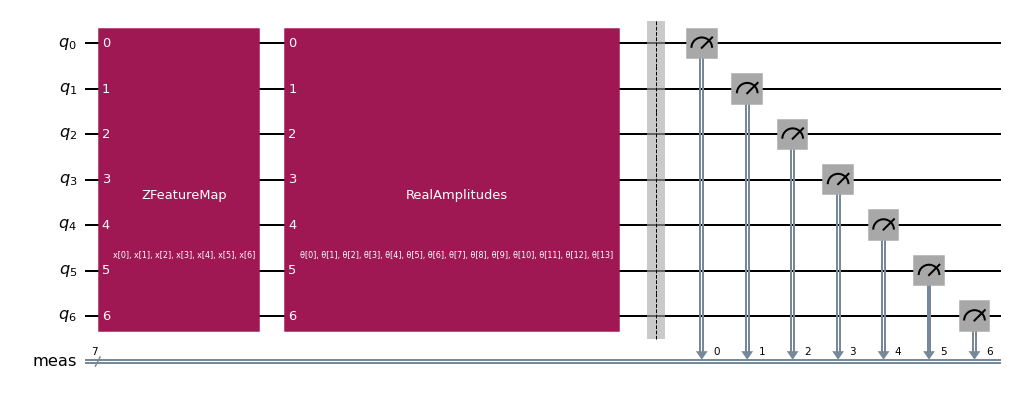

In [ ]:
backend=rigetti_qpu_backend
#backend = Aer.get_backend('qasm_simulator')
from qiskit.circuit.library import RealAmplitudes, ZFeatureMap, ZZFeatureMap, EfficientSU2

num_features =7
feature_map=ZFeatureMap(num_features,reps=1)
model=RealAmplitudes(num_features, reps=1, entanglement="pairwise")
circuit=feature_map.compose(model)
circuit.measure_all()
circuit.draw("mpl",style="iqx")

In [ ]:
from pickle import TRUE
from qiskit.circuit.library import RealAmplitudes, ZFeatureMap, ZZFeatureMap, EfficientSU2
from qiskit.result.mitigation.utils import counts_probability_vector
from qiskit.algorithms.optimizers import COBYLA, SPSA
from qiskit.result import counts
import time
cutoff=1e-10
shots=1024
start = time.perf_counter()

transpiled=transpile(circuit,backend)
#parity calculation function
def parity(bitstring):
  #return 1 if there's an even number of 1's , otherwise return -1
  return 1 if bitstring.count("1") %2 else -1
predic_Call_count = 0
#prediction needed for calculation theta and also prediction-called by loss()
def predict(theta, point, return_probabilities=False):
  global predic_Call_count
  predic_Call_count += 1
  print("predic_Call_count=",predic_Call_count,end='\r')
  #feeding theta to circuit 
  bound = transpiled.assign_parameters(np.concatenate((point, theta)))
  #exception handling of quantum device failure
  while True:
    try:
      job=backend.run(bound, shots=shots)
      #print("jobID=",job.id())
      result=job.result()
      counts=result.get_counts()      
      pr_1=0
      for bitstr , count in counts.items():
        if parity(bitstr)==1:
          pr_1+=count/shots
      if return_probabilities:
        return pr_1
      return 1 if pr_1>0.5 else 0
      #f.write("   jobID = " + str(job.id())+ "  result = " + str(pr_1)+ "\n\n")
   
    except Exception as e:
      print(f"Error: {str(e)}. Skipping job.")
      continue  # Skip to the next job if there's an error
#safe logarithm function
def safe_log(value):
  return np.log(max(cutoff,value))
#cross-entropy loss function
def loss(theta, X, y):  
  loss_value=0
  loss_call_count = getattr(loss, 'call_count', 0) + 1  
  setattr(loss, 'call_count', loss_call_count)  
  print(f"Call_Loss_implies_to_call_predict {loss_call_count}:")
  for X_i, y_i in zip(X,y):
    pr_1=predict(theta, X_i,return_probabilities=True)
    loss_value -=y_i*safe_log(pr_1)+(1-y_i)*safe_log(1-pr_1)
  return loss_value
#theta calculation
one_zero_labels_train=(1+np.array(labels_train))/2
cost=lambda theta: loss(theta, points_train, one_zero_labels_train.tolist())
#optimization
x0=np.random.random(model.num_parameters)
spsa = SPSA()
result_theta = spsa.minimize(cost, x0=x0)


Call_Loss_implies_to_call_predict 1:
Call_Loss_implies_to_call_predict 2:
Call_Loss_implies_to_call_predict 3:
Call_Loss_implies_to_call_predict 4:
Call_Loss_implies_to_call_predict 5:
Call_Loss_implies_to_call_predict 6:
Call_Loss_implies_to_call_predict 7:
Call_Loss_implies_to_call_predict 8:
Call_Loss_implies_to_call_predict 9:
Call_Loss_implies_to_call_predict 10:
Call_Loss_implies_to_call_predict 11:
Call_Loss_implies_to_call_predict 12:
Call_Loss_implies_to_call_predict 13:
Call_Loss_implies_to_call_predict 14:
Call_Loss_implies_to_call_predict 15:
Call_Loss_implies_to_call_predict 16:
Call_Loss_implies_to_call_predict 17:
Call_Loss_implies_to_call_predict 18:
Call_Loss_implies_to_call_predict 19:
Call_Loss_implies_to_call_predict 20:
Call_Loss_implies_to_call_predict 21:
Call_Loss_implies_to_call_predict 22:
Call_Loss_implies_to_call_predict 23:
Call_Loss_implies_to_call_predict 24:
Call_Loss_implies_to_call_predict 25:
Call_Loss_implies_to_call_predict 26:
Call_Loss_implies_to_

In [ ]:
predictions = [predict(result_theta.x,X_i,return_probabilities=False) for X_i in points_test.tolist()]

In [ ]:
correct_predictions = 0
one_zero_labels_test=(1+np.array(labels_test))/2

for label, predicted_label in zip(one_zero_labels_test, predictions):
  if label == predicted_label:
    correct_predictions += 1

accuracy = correct_predictions / len(one_zero_labels_test)
print("Accuracy:", accuracy)

Accuracy: 0.6633333333333333


In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright